# TS-ASAP: Smoothing

In [321]:
import random
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

In [2]:
from datetime import datetime

def to_datetime(token):
    return datetime.strptime(token, "%Y-%m-%d %H:%M:%S")

In [3]:
def get_moving_average(vals, window=3):
    ma_vals = []
    for i in range(window, len(vals)):
        x = vals[i-window+1:i+1]
        ma_vals.append(sum(x)/len(x))
    return ma_vals

In [45]:
def ts_asap(data, bottom=None, top=None, start=1, end=100, step=2, plot=None):
    if not plot:
        plot = []
    
    all_ts, all_vals = [], []
    for tokens in data:
        if type(tokens[0]) == 'str':
            ts, value = to_datetime(tokens[0]), float(tokens[1])
        else:
            ts, value = tokens[0], float(tokens[1])
        all_ts.append(ts)
        all_vals.append(value)

    plt.figure(figsize=(20,6))
    plt.title("Raw Plot", fontdict={'fontsize': 18})
    if bottom or top:
        plt.ylim(bottom=bottom, top=top)
    plt.plot(all_ts, all_vals)
    
    max_kurt, best_window = -1000, 12
    for window in range(start, end, step):
        ma_vals = get_moving_average(all_vals, window=window)
        kurt = kurtosis(ma_vals)
        if kurt >= max_kurt:
            max_kurt, best_window = kurt, window
        if window in plot:
            plt.figure(figsize=(20,6))
            if bottom or top:
                plt.ylim(bottom=bottom, top=top)
            plt.title(f"Window Length {window}", fontdict={'fontsize': 18})
            plt.plot(all_ts[window:], ma_vals)


    print("best window", best_window)
    ma_vals = get_moving_average(all_vals, window=best_window)
    plt.figure(figsize=(20,6))
    if bottom or top:
        plt.ylim(bottom=bottom, top=top)
    plt.title(f"Optimal Window Length {best_window}", fontdict={'fontsize': 18})
    plt.plot(all_ts[best_window:], ma_vals)

best window 48


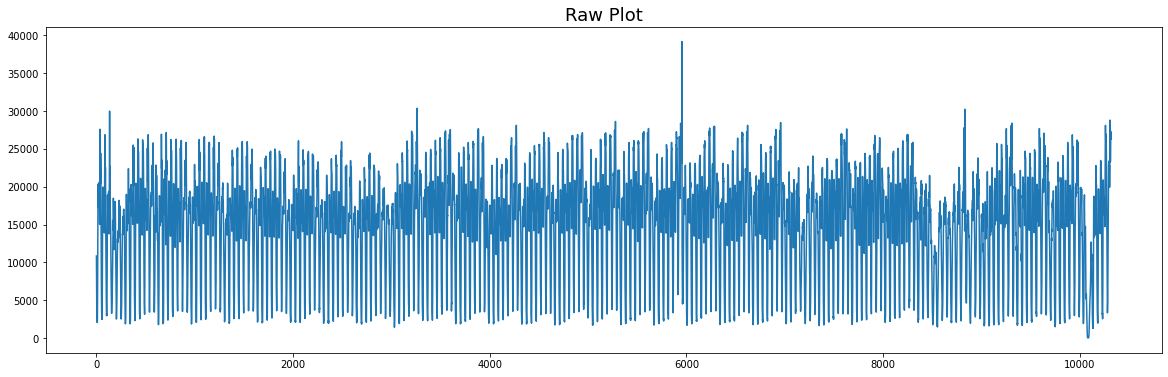

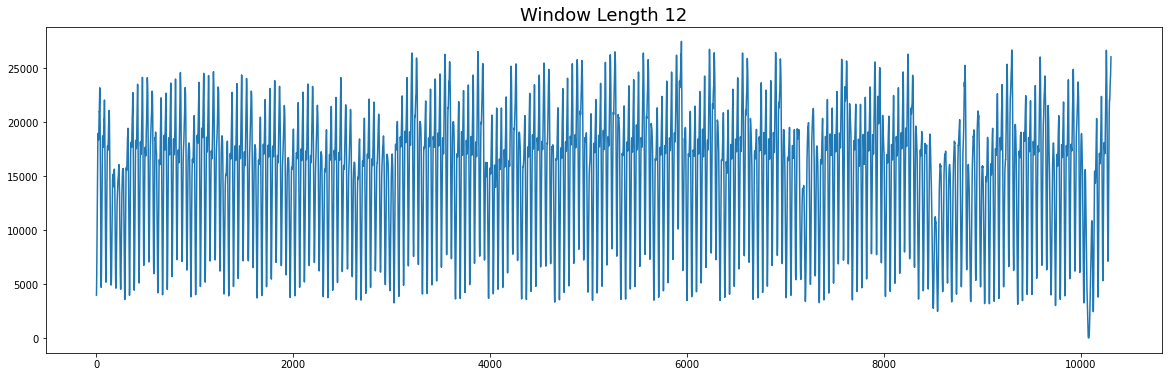

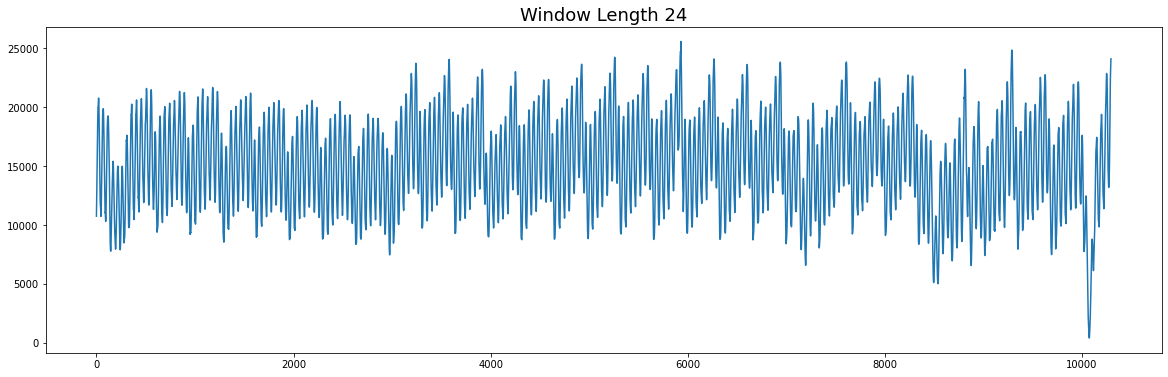

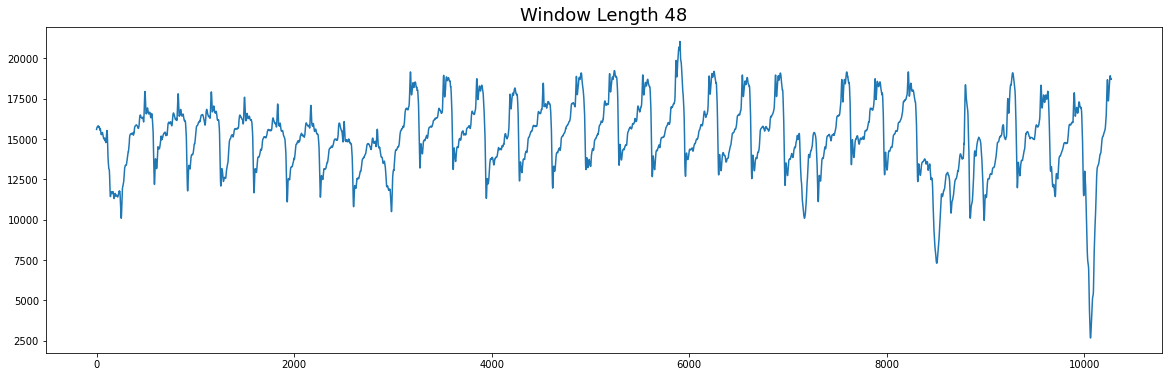

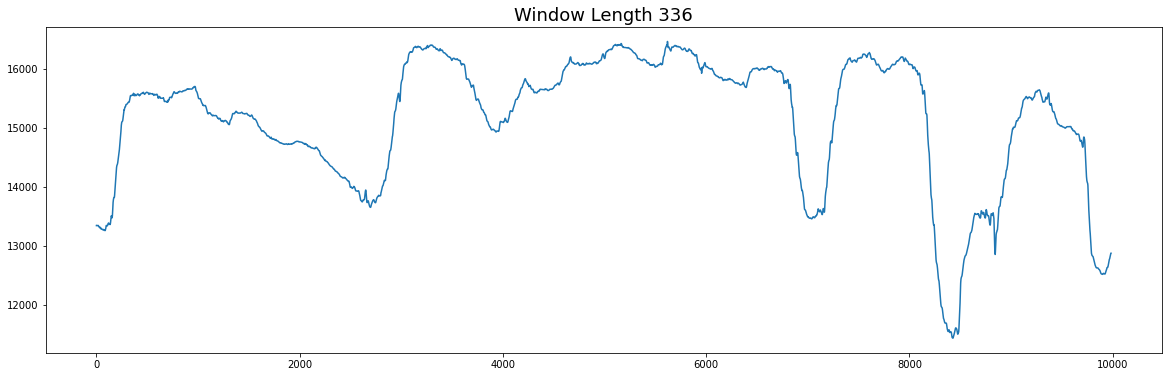

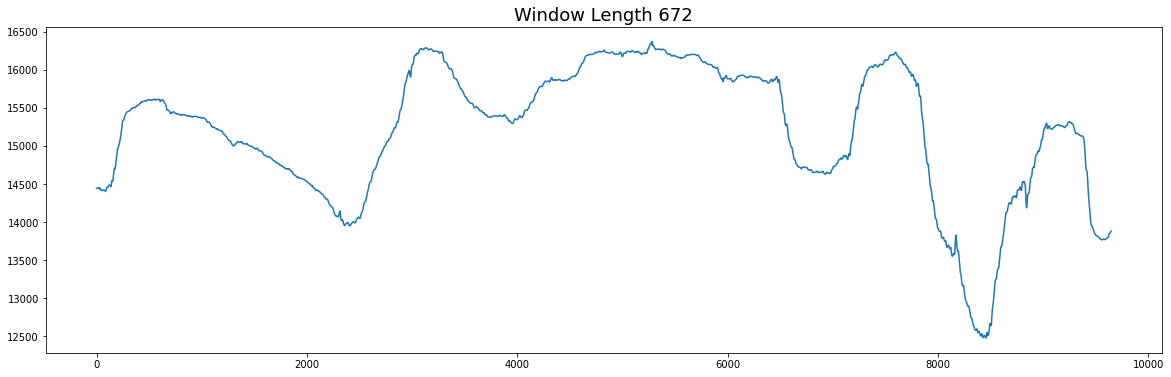

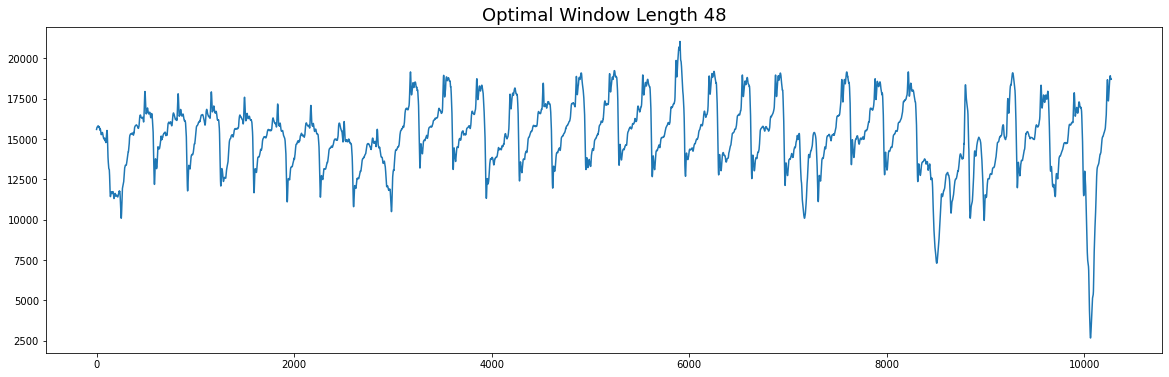

In [5]:
data = []
with open('nyc_taxi.csv', 'r') as f:
    for line in f.readlines()[1:]:
        data.append(line.strip().split(","))
ts_asap(data, start=12, end=1000, step=12, plot=[12, 24, 48, 48*7, 48*2*7, 48*2*7])

best window 2


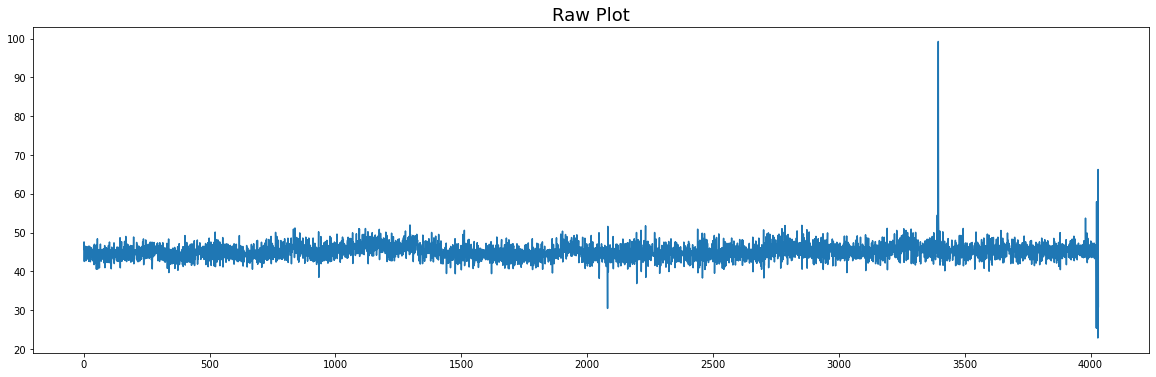

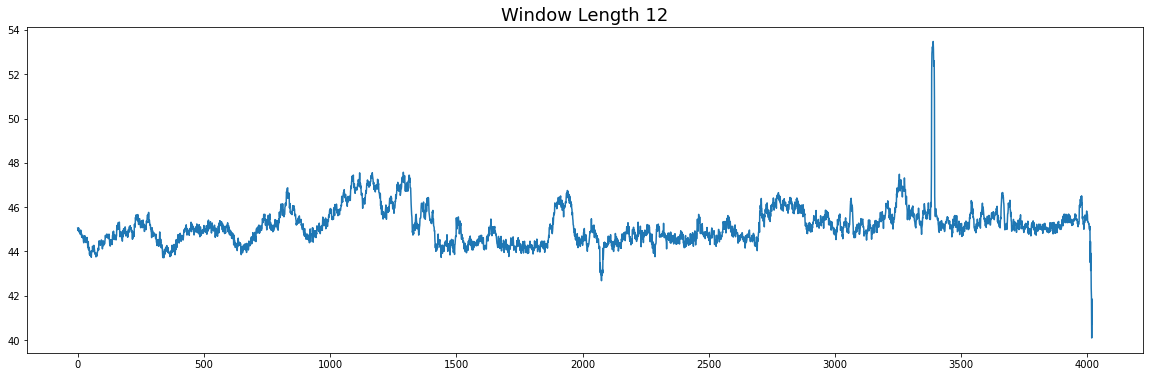

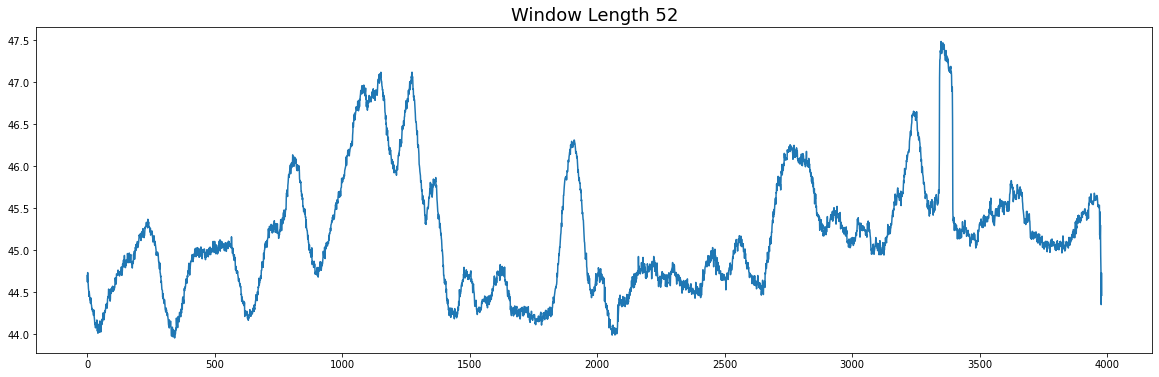

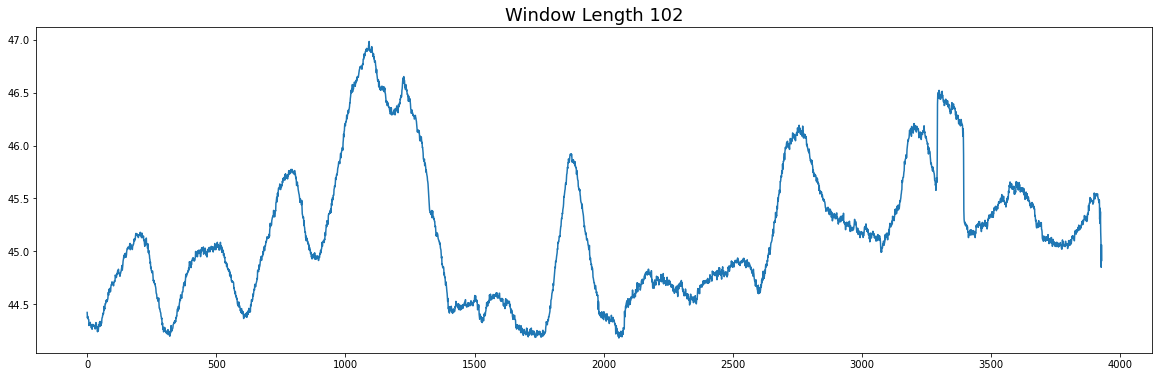

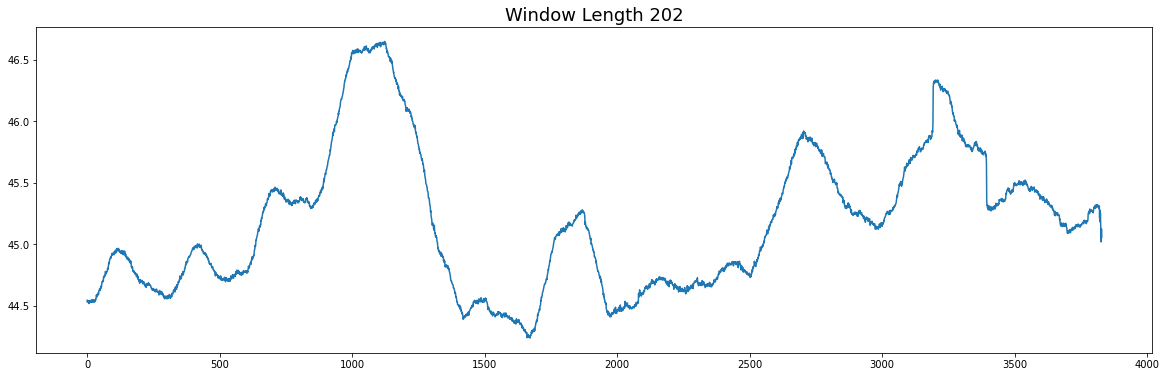

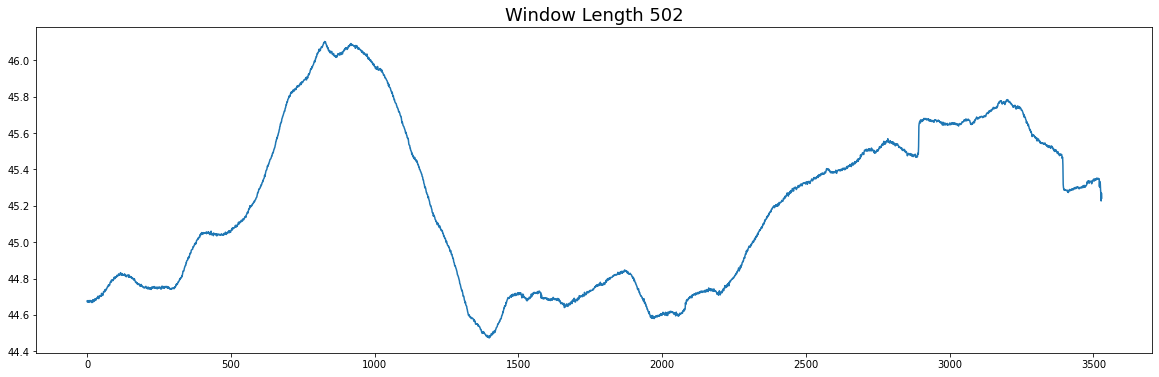

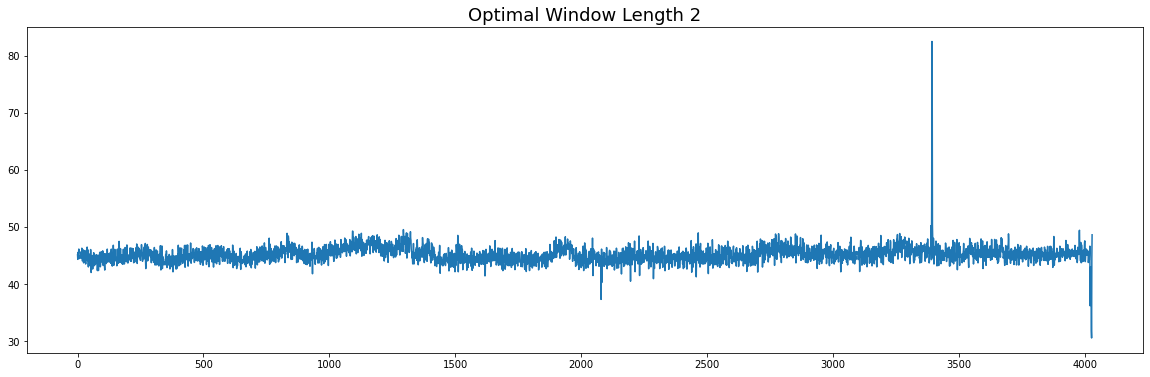

In [6]:
data = []
with open('ec2_request_latency_system_failure.csv', 'r') as f:
    for line in f.readlines()[1:]:
        data.append(line.strip().split(","))
ts_asap(data, start=2, end=1000, step=10, plot=[12, 52, 102, 202, 502])

best window 291


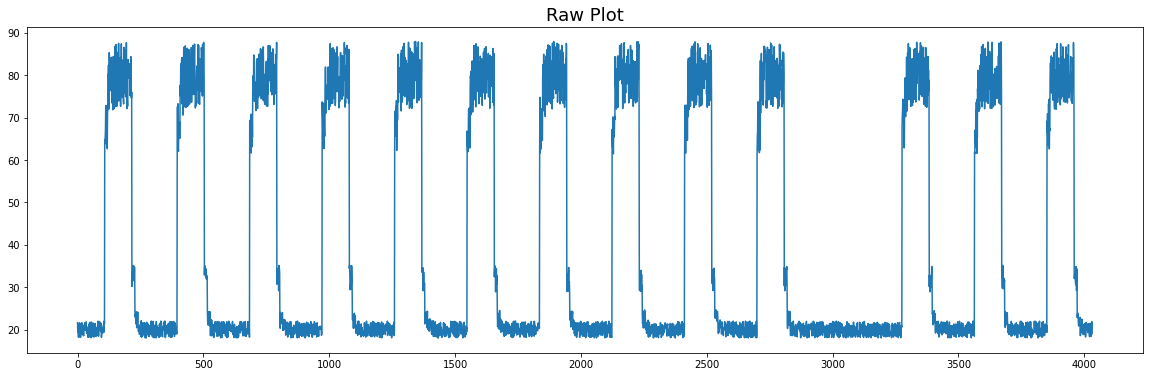

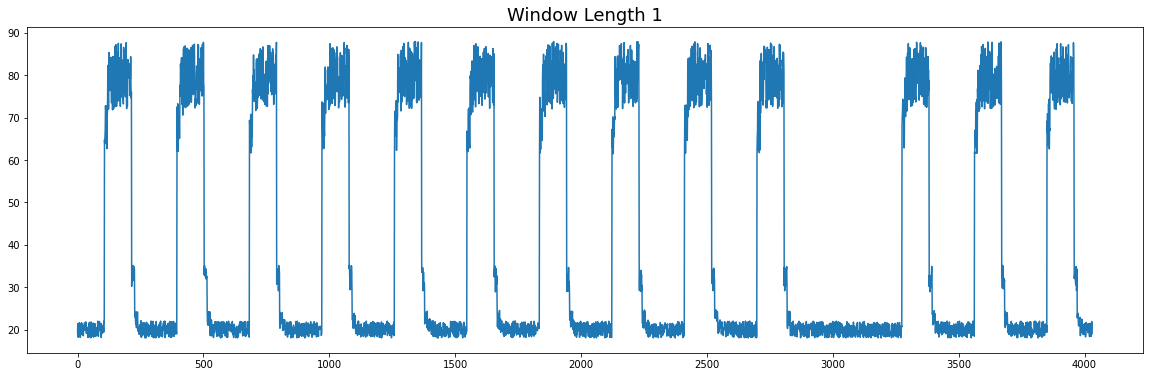

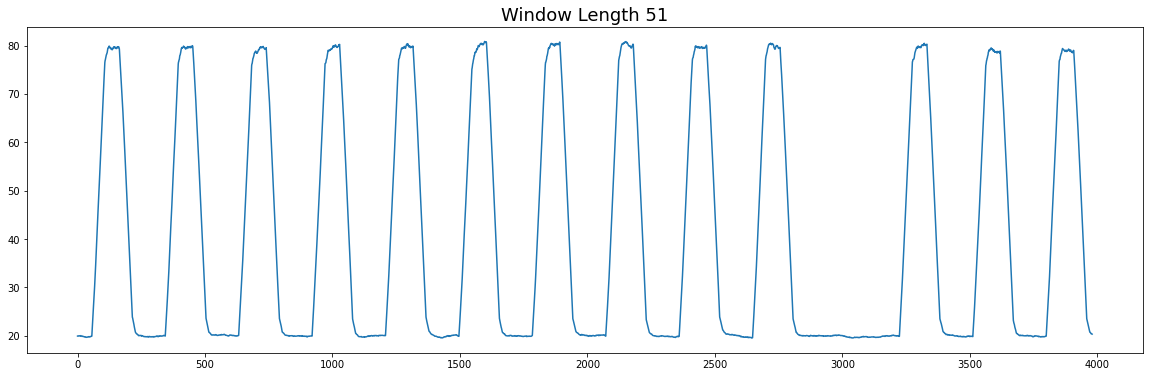

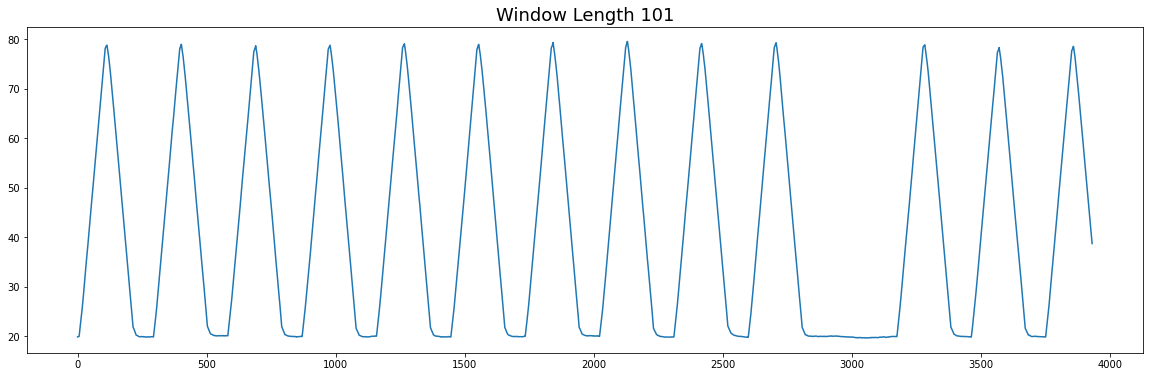

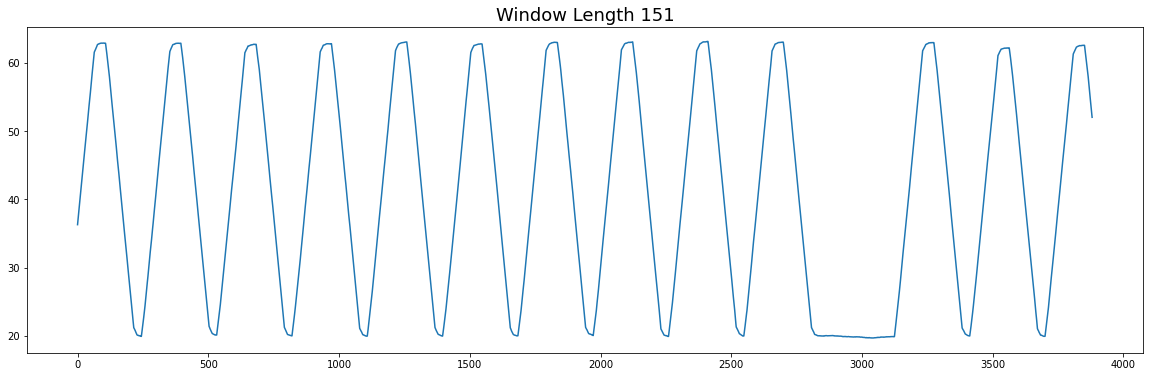

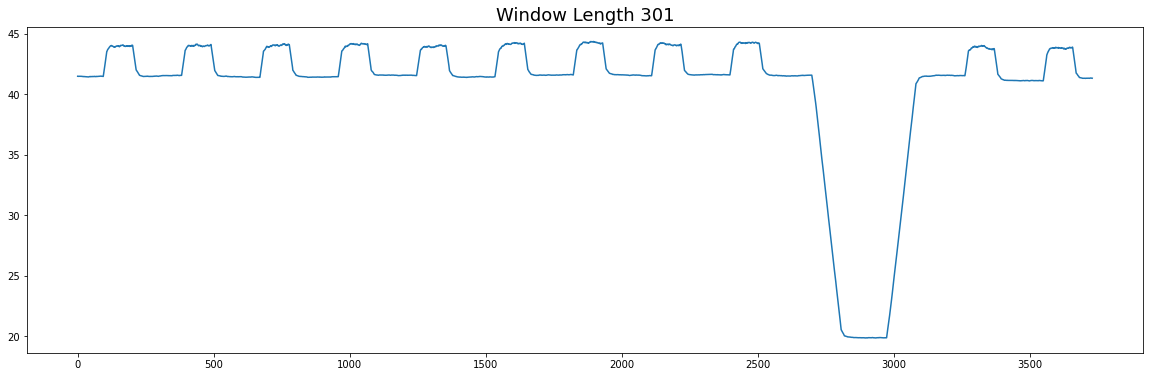

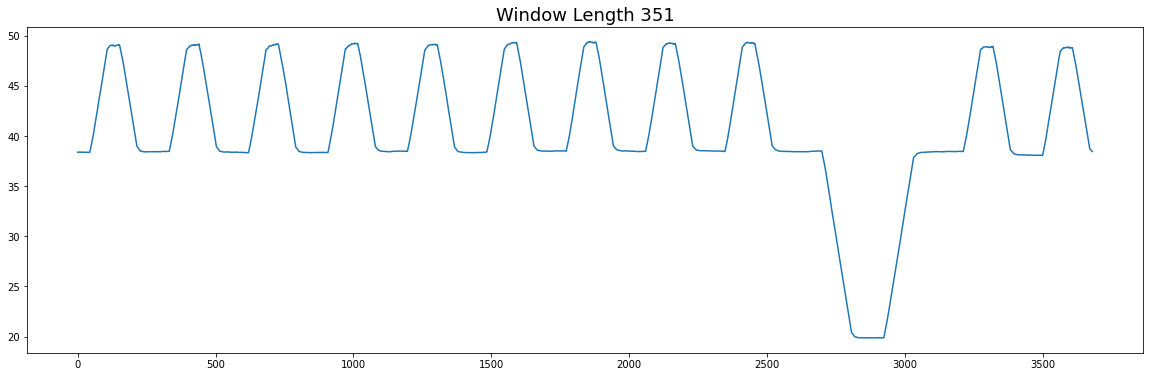

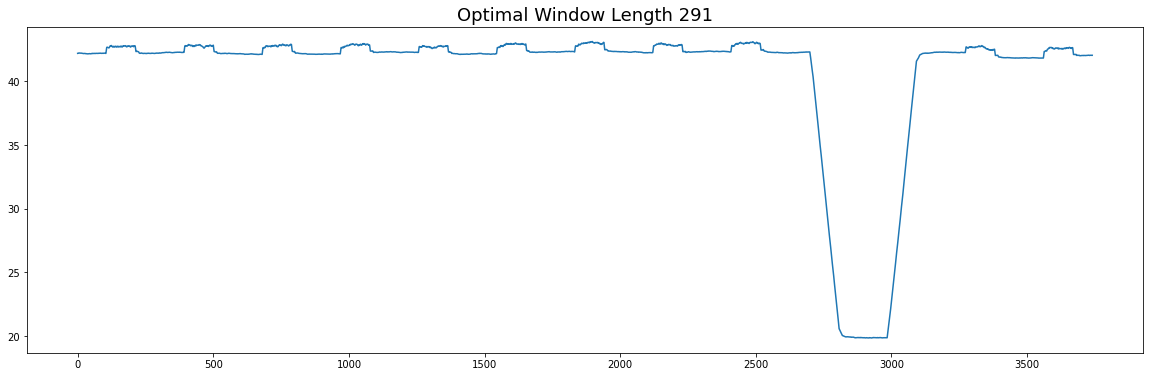

In [7]:
data = []
with open('art_daily_nojump.csv', 'r') as f:
    for line in f.readlines()[1:]:
        data.append(line.strip().split(","))
ts_asap(data, start=1, end=400, step=5, plot=[1, 51, 101, 151, 301, 351])

best window 287


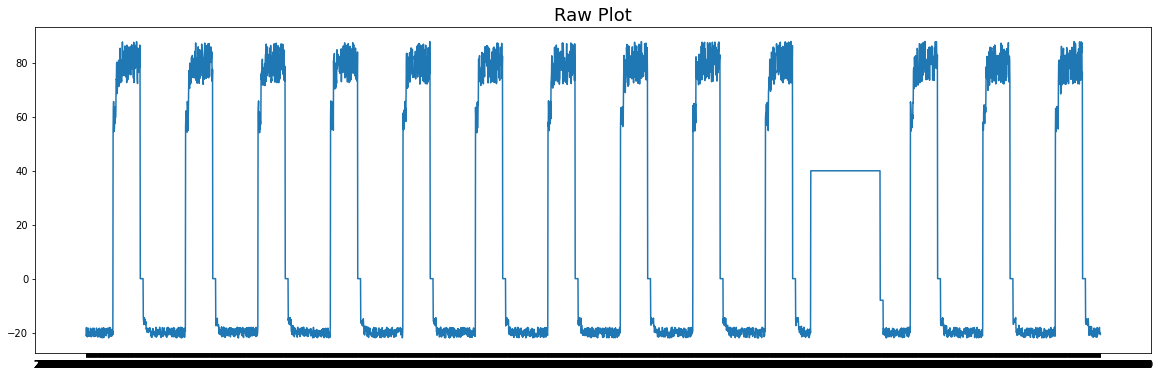

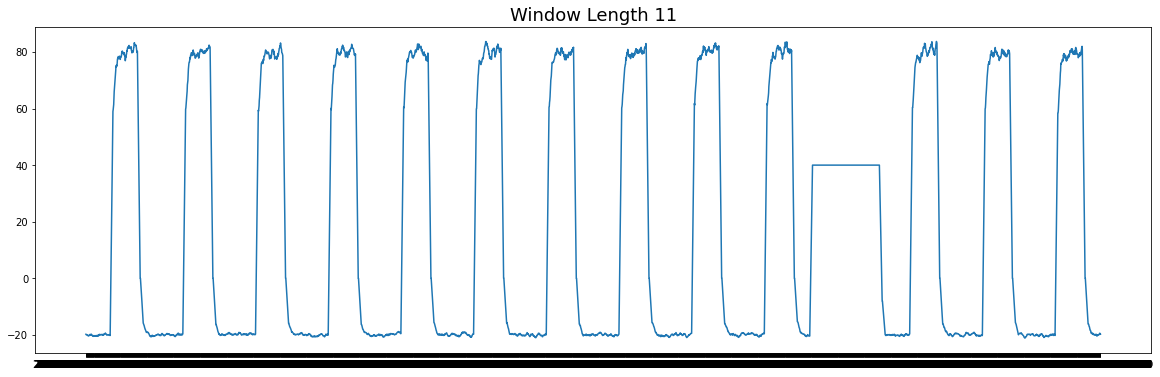

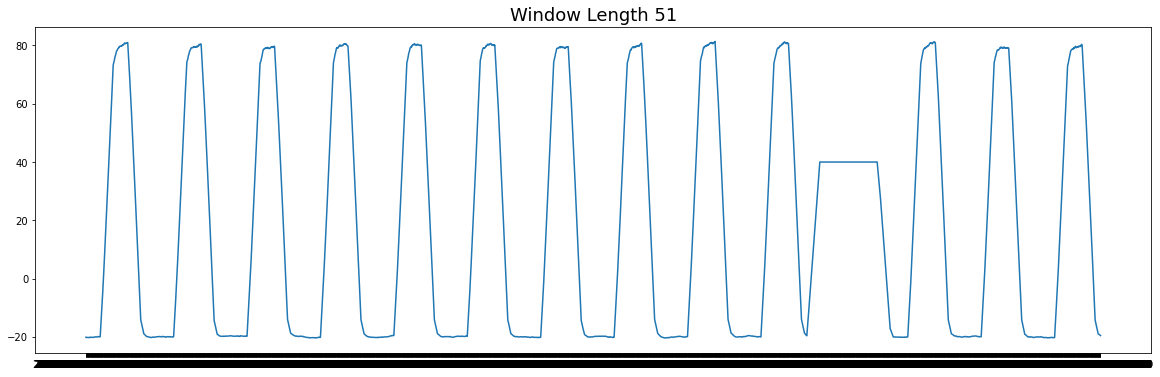

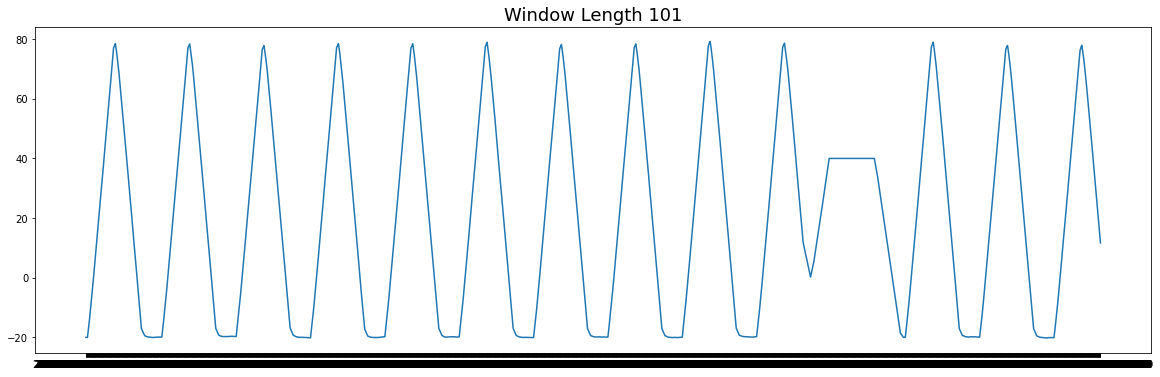

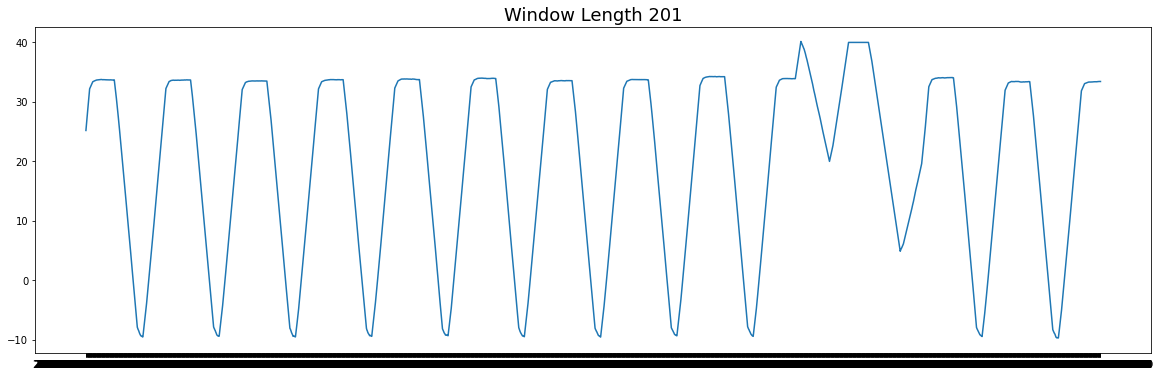

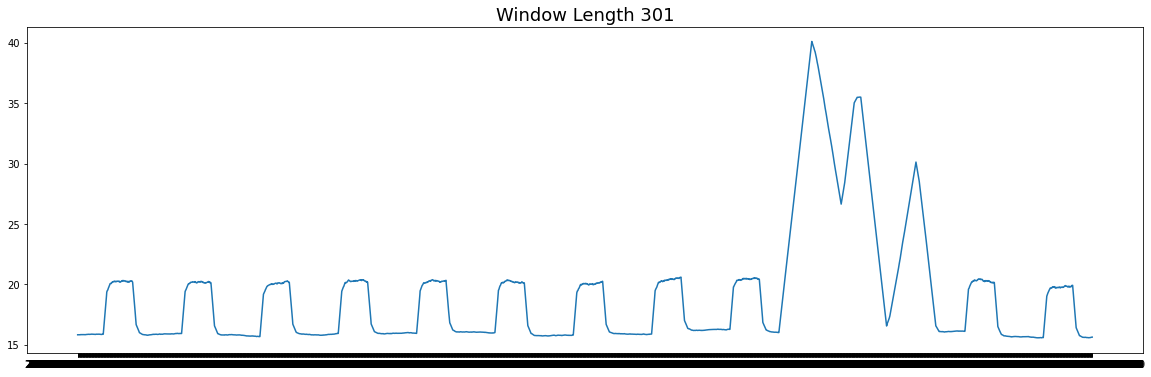

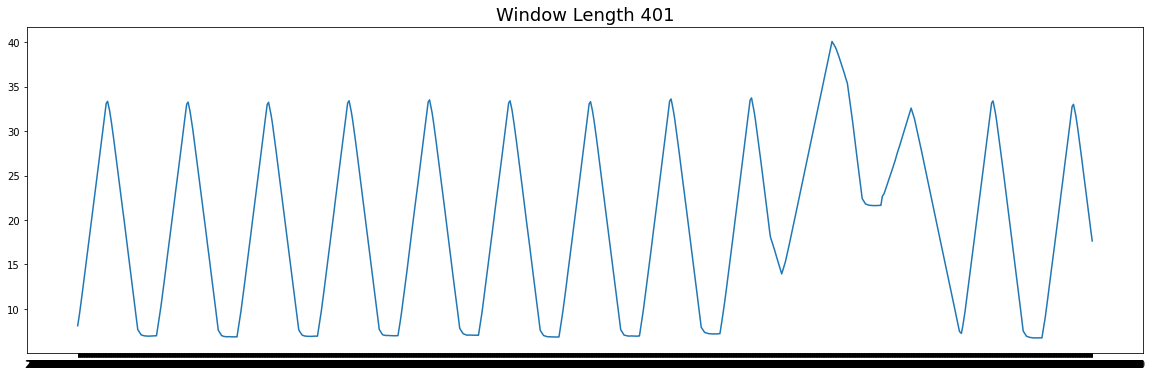

Error in callback <function flush_figures at 0x1061a7dd0> (for post_execute):


KeyboardInterrupt: 

In [50]:
data = []
with open('art_daily_flatmiddle.csv', 'r') as f:
    for line in f.readlines()[1:]:
        data.append(line.strip().split(","))
ts_asap(data, start=1, end=1000, step=1, plot=[11, 51, 101, 201, 301, 401, 501, 701, 999])

best window 2


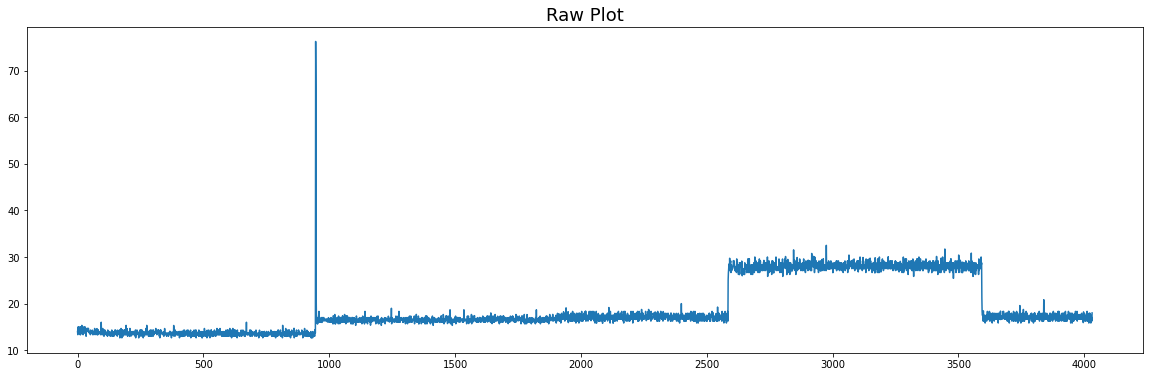

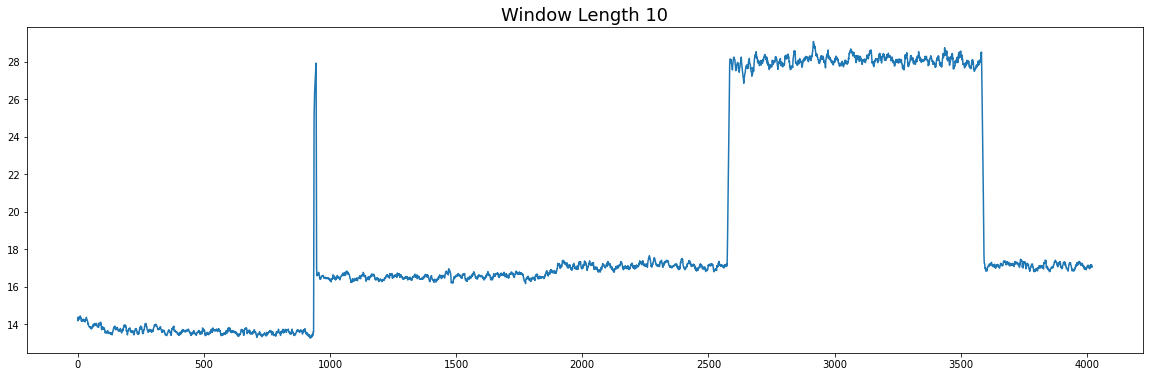

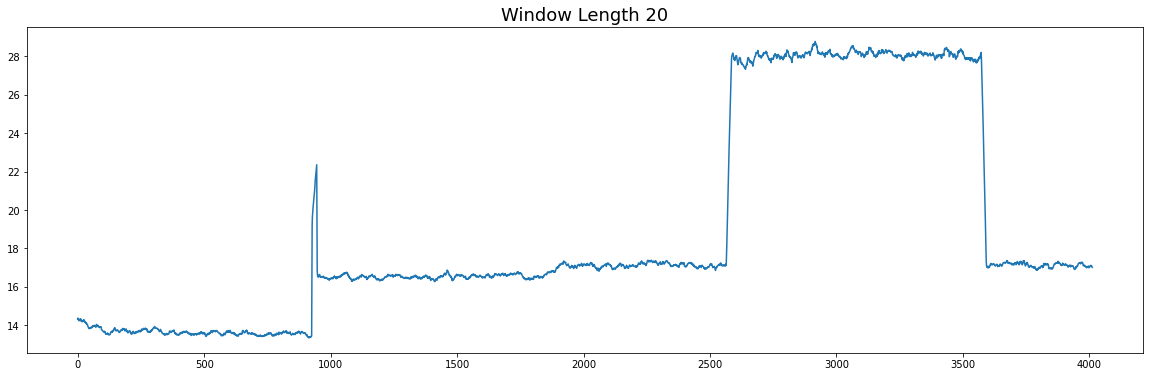

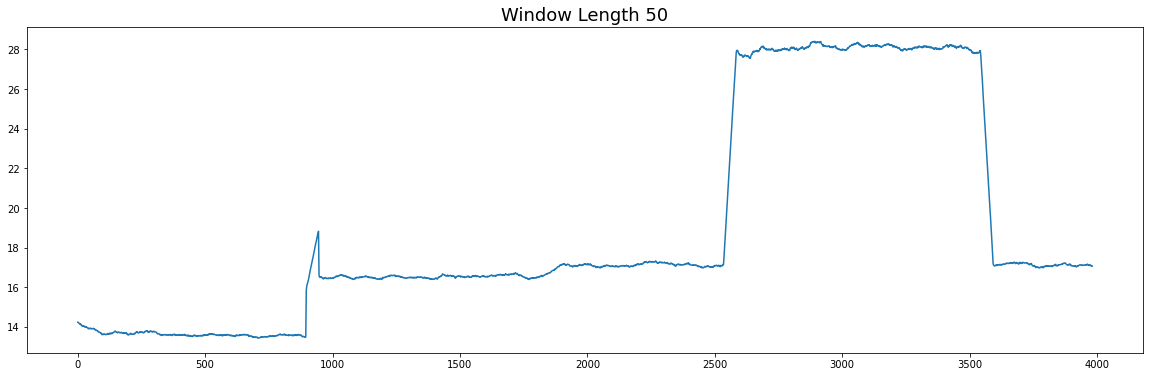

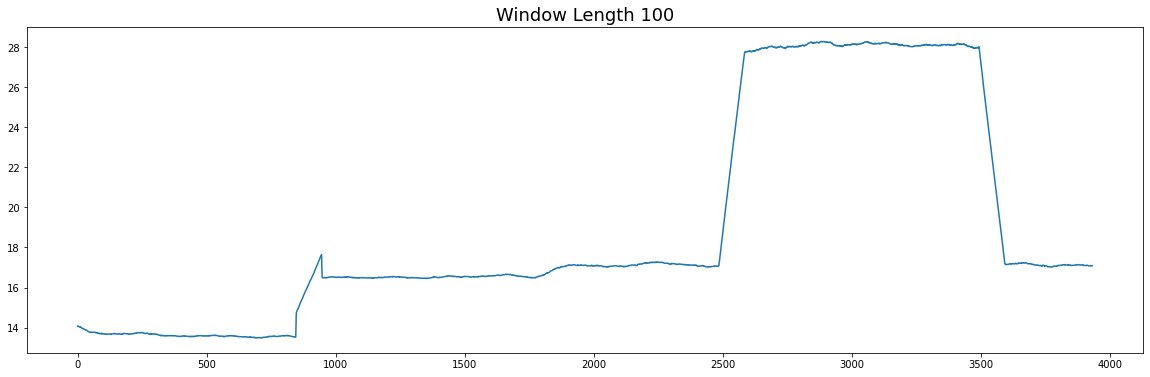

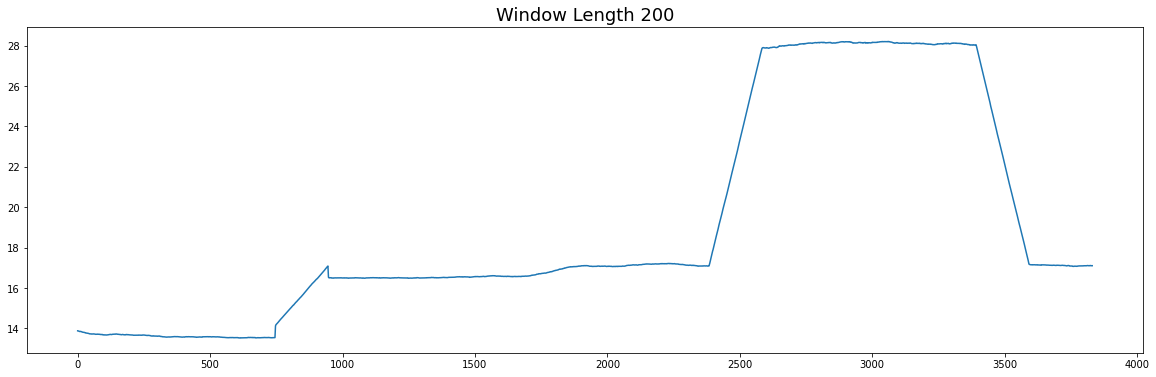

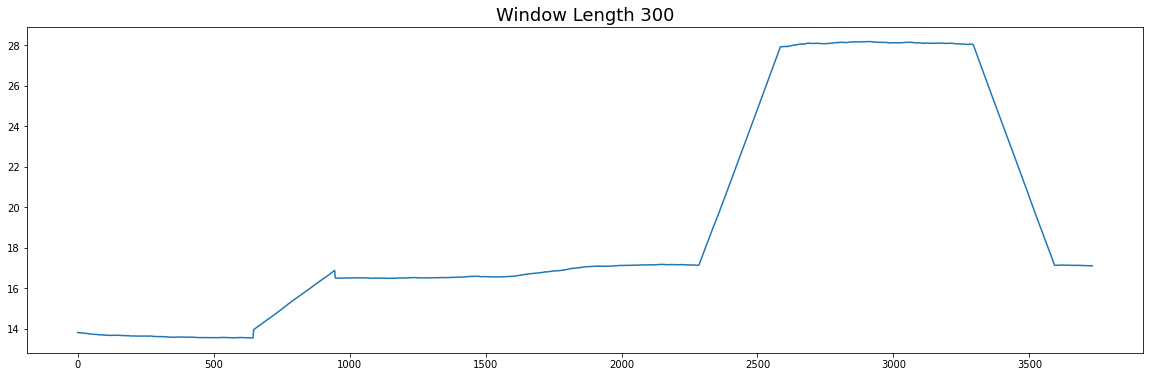

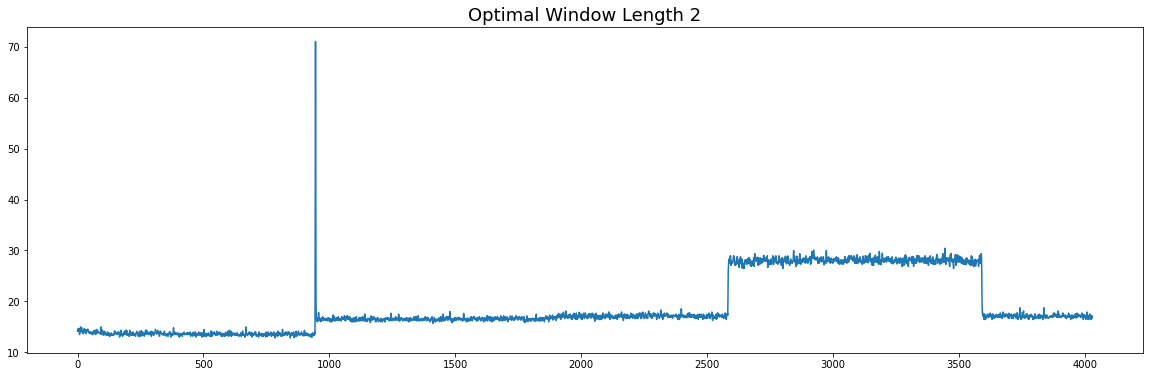

In [9]:
data = []
with open('rds_cpu_utilization_e47b3b.csv', 'r') as f:
    for line in f.readlines()[1:]:
        data.append(line.strip().split(","))
ts_asap(data, start=2, end=500, step=2, plot=[10, 20, 50, 100, 200, 300, 500])

In [36]:
data = []
with open('./GlobalLandTemperaturesByCountry.csv', 'r') as f:
    for line in f:
        tokens = line.strip().split(",")
        if tokens[-1] == "India":
            ts = datetime.strptime(tokens[0], "%Y-%m-%d")
            if tokens[1] and ts > datetime(1870, 1, 1):
                data.append((ts, float(tokens[1]),))

best window 12


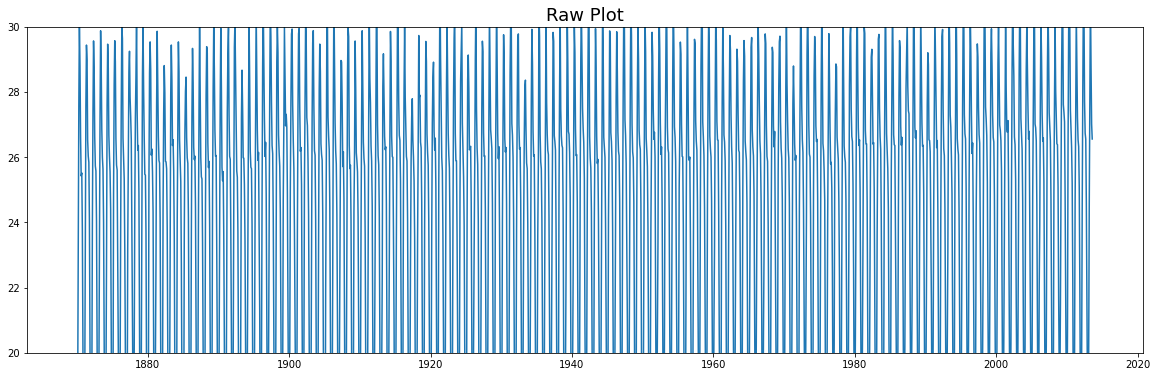

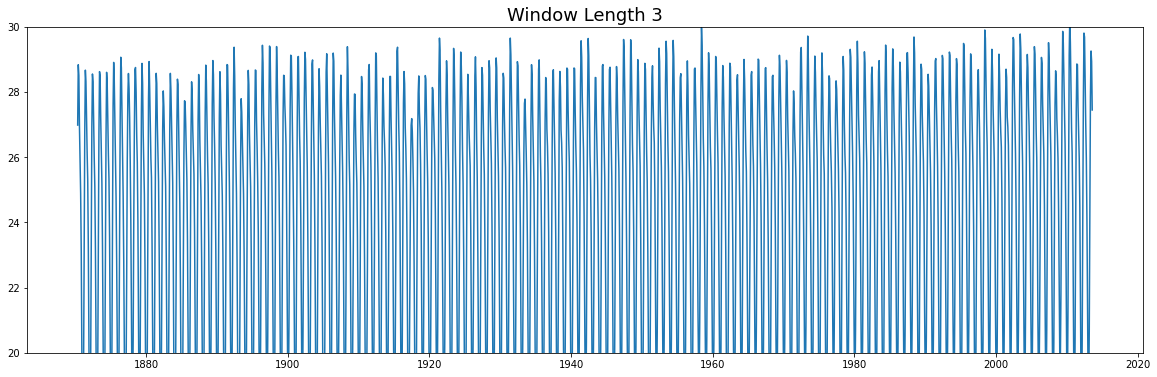

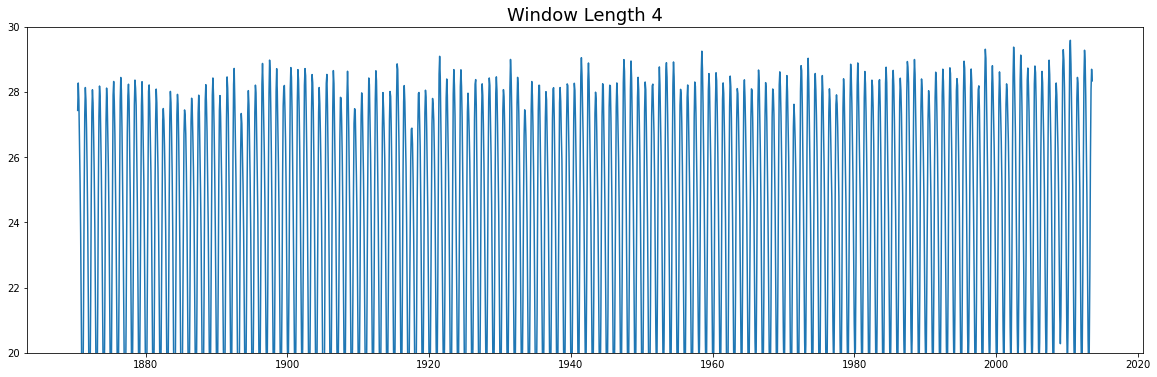

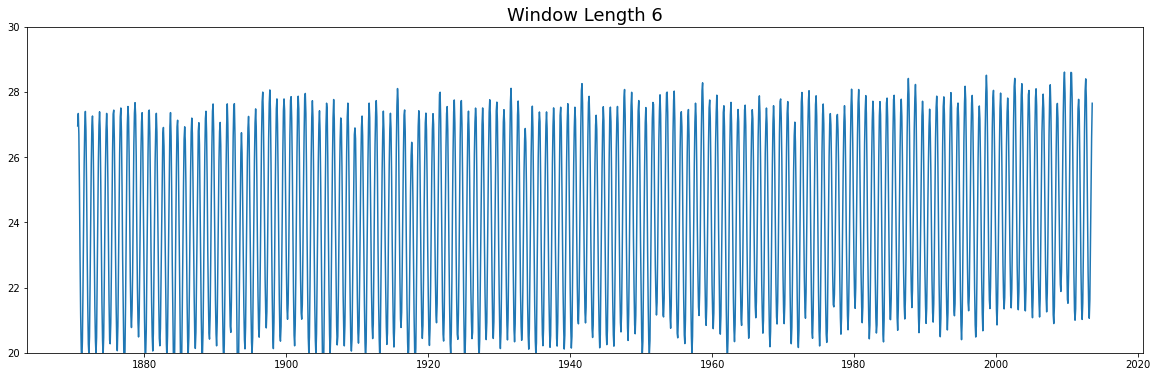

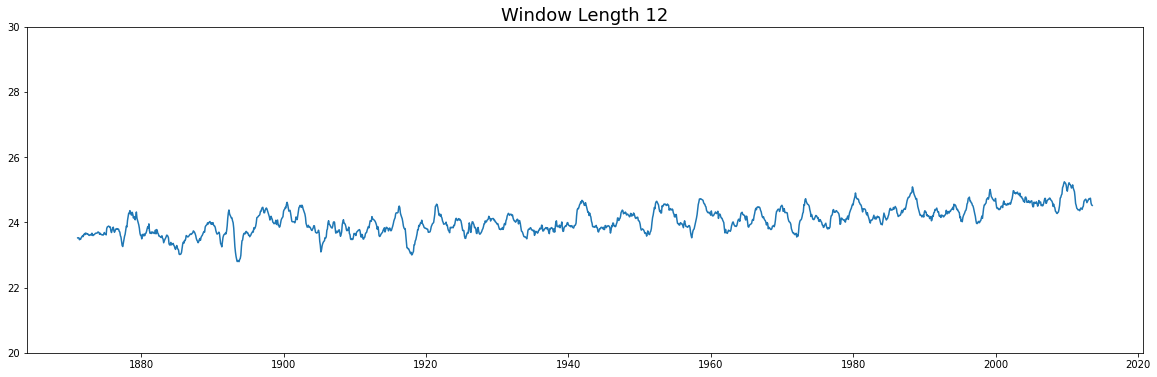

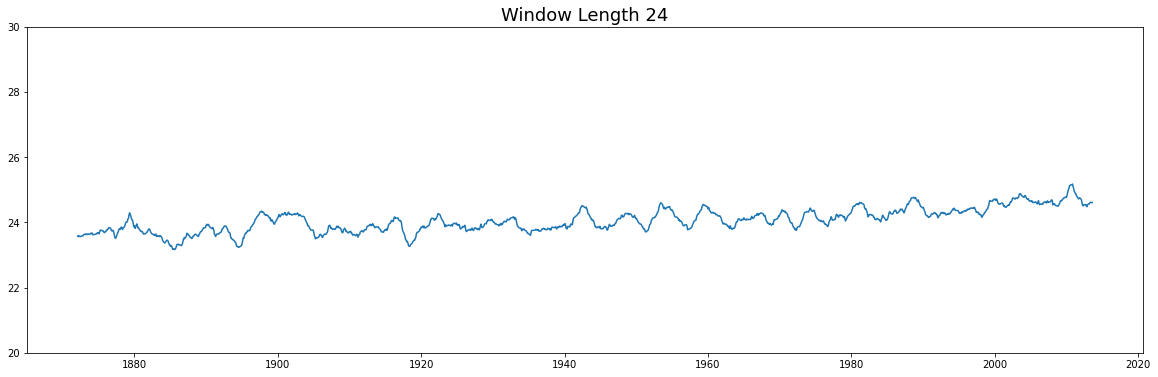

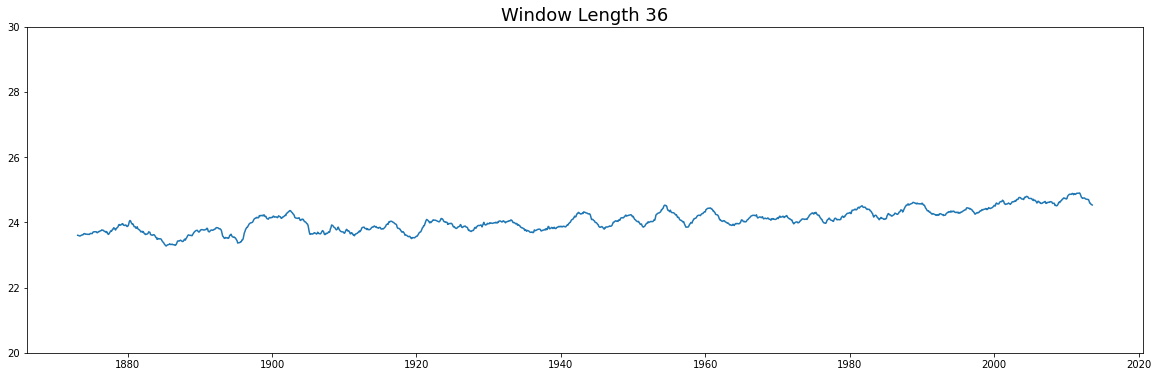

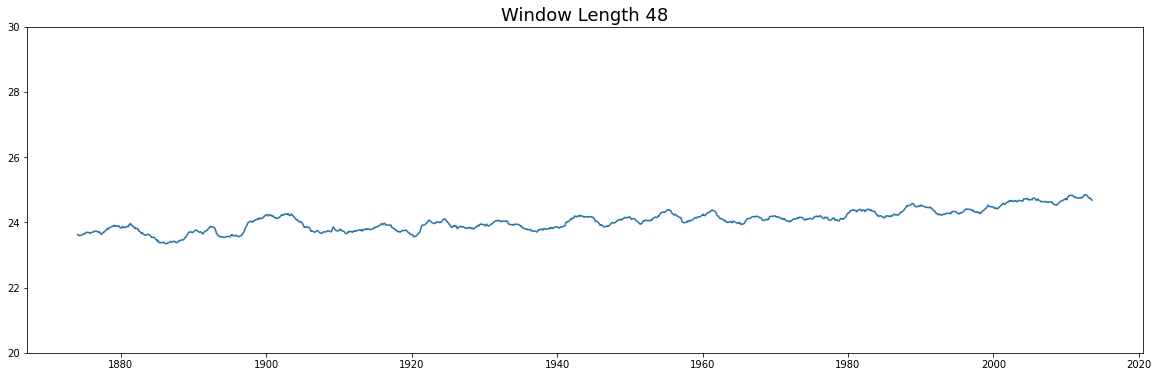

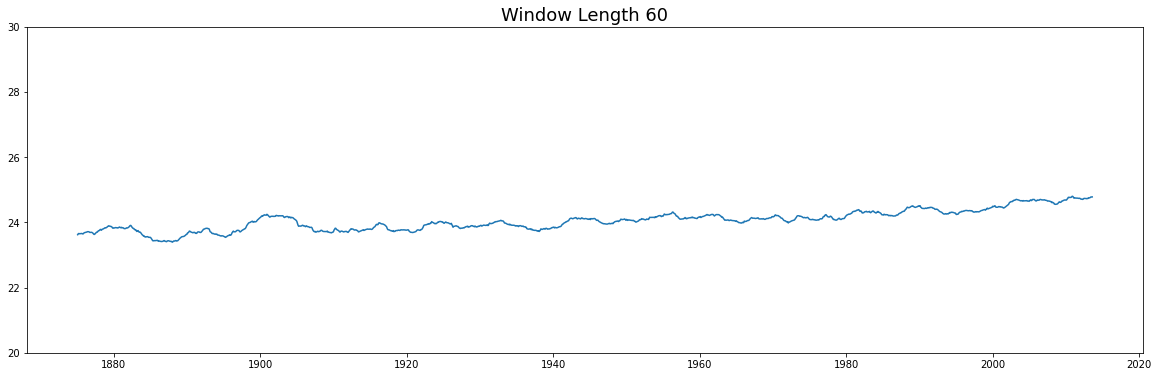

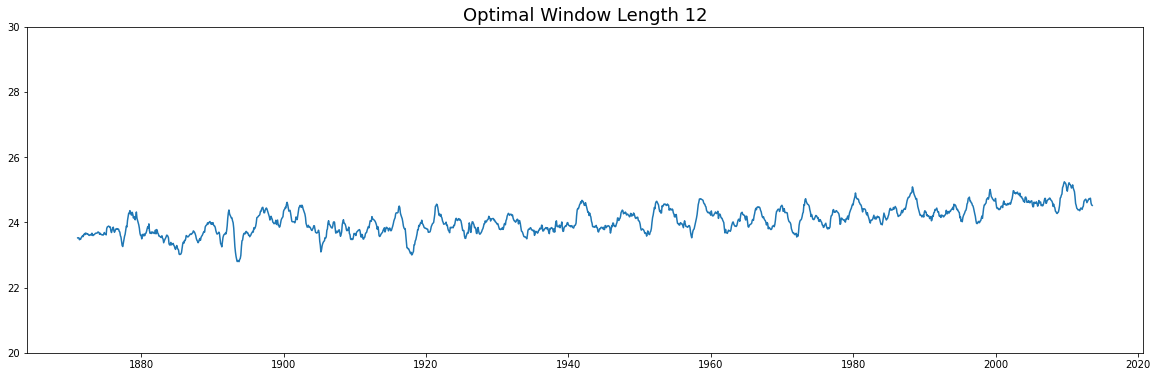

In [48]:
ts_asap(data, start=1, end=61, step=1, plot=[3, 4, 6, 12, 24, 36, 48, 60], bottom=20, top=30)

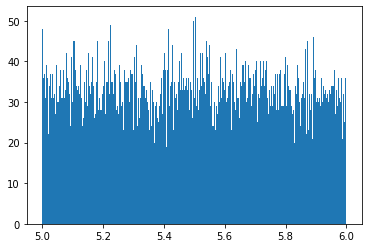

kurtosis 1.8118038978088384


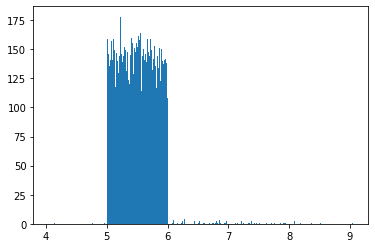

kurtosis 12.567242876929468


In [347]:
data = list(map(lambda x: x + random.random(), [5] * 10000))
plt.hist(data, 300)
plt.show()
print("kurtosis", kurtosis(data, fisher=False))


data = np.append(data, np.random.normal(6.5, 1, 100))
plt.hist(data, 350)
plt.show()
print("kurtosis", kurtosis(data, fisher=False))

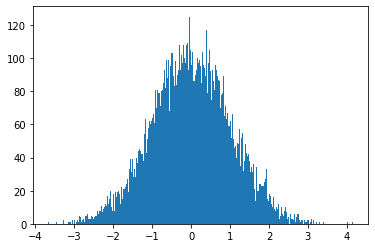

kurtosis 2.9580423899177015


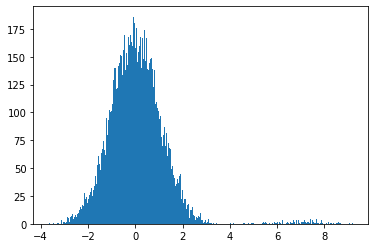

kurtosis 12.483782897883454


In [328]:
data = np.random.normal(0, 1, 10000)
plt.hist(data, 300)
plt.show()
print("kurtosis", kurtosis(data, fisher=False))

data = np.append(data, np.random.normal(7, 1, 100))
plt.hist(data, 300)
plt.show()
print("kurtosis", kurtosis(data, fisher=False))

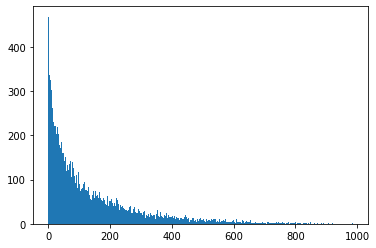

kurtosis 6.072465033284483


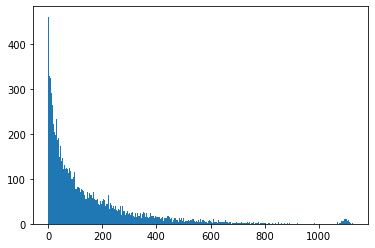

kurtosis 11.022753644489907


In [346]:
data = list(map(lambda x: (random.random() * random.random()) * random.randint(100, 1000), [5] * 10000))
plt.hist(data, 300)
plt.show()
print("kurtosis", kurtosis(data, fisher=False))


data = np.append(data, np.random.normal(1100, 10, 100))
plt.hist(data, 350)
plt.show()
print("kurtosis", kurtosis(data, fisher=False))